# Uber Pickups Project

**Importing Standard Librairies**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import configparser as cp
from tqdm import tqdm

from sklearn.cluster import DBSCAN

**Data Preparation**

In [2]:
df = pd.read_csv('./Datasets/uber-raw-data-apr14.csv', infer_datetime_format=True, parse_dates=[0])

In [3]:
tqdm.pandas()

In [4]:
df['Date/Time'].head(10)

0   2014-04-01 00:11:00
1   2014-04-01 00:17:00
2   2014-04-01 00:21:00
3   2014-04-01 00:28:00
4   2014-04-01 00:33:00
5   2014-04-01 00:33:00
6   2014-04-01 00:39:00
7   2014-04-01 00:45:00
8   2014-04-01 00:55:00
9   2014-04-01 01:01:00
Name: Date/Time, dtype: datetime64[ns]

In [5]:
df['Date/Time'].dt.hour.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Date/Time, dtype: int64

In [6]:
df['Hour'] = df['Date/Time'].dt.hour

In [7]:
def split_time(x):
    if x >= 23 or x <= 5:
        return "night"
    elif x >= 6 and x <= 8:
        return "early_am"
    elif x >= 9 and x <= 11:
        return "am"
    elif x >= 12 and x <= 14:
        return "lunch"
    elif x >= 15 and x <= 16:
        return "pm"
    elif x>= 17 and x<= 18:
        return "late_pm"
    elif x>= 19 and x<= 20:
        return "diner"
    else:
        return "early_night"

In [8]:
df['Period'] = df['Hour'].progress_apply(lambda x: split_time(x))

100%|██████████| 564516/564516 [00:00<00:00, 736339.89it/s]


In [9]:
df.Period.head()

0    night
1    night
2    night
3    night
4    night
Name: Period, dtype: object

In [10]:
night = df[df.Period == "night"]

In [11]:
night.shape

(65874, 6)

In [12]:
early_am = df[df.Period == "early_am"]
am = df[df.Period == "am"]
lunch = df[df.Period == "lunch"]
pm = df[df.Period == "pm"]
late_pm = df[df.Period == "late_pm"]
diner = df[df.Period == "diner"]
early_night = df[df.Period == "early_night"]

In [13]:
for dtf in [night, early_am, am, lunch, pm, late_pm, diner, early_night]:
    print(dtf.shape)

(65874, 6)
(66265, 6)
(54578, 6)
(69218, 6)
(77327, 6)
(88478, 6)
(75167, 6)
(67609, 6)


In [14]:
night.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Hour', 'Period'], dtype='object')

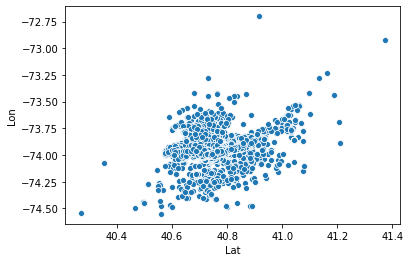

In [15]:
sns.scatterplot(x='Lat', y='Lon', data=night)

# Vizualisation by Hour

**Importing Bokeh**

In [16]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.io import export_png

In [17]:
# Config parser
config = cp.ConfigParser()
config.read('config.ini')

key = config.get('AUTH', 'key')
ra_key = config.get('AUTH', 'ra_key')

**Night**

In [18]:
output_file('./html_by_hour/night.html')

map_options = GMapOptions(lat=40.7128, lng=-74.0060, map_type="roadmap", zoom=10)

p = gmap(ra_key, map_options, title="New York by Night - 23h to 5h (include)")

cluster = ColumnDataSource(data=dict(lat=night.Lat, lon=night.Lon))

p.circle(x="lon", y="lat", size=7, fill_color="dimgrey", fill_alpha=0.8, source=cluster)

show(p)

#export_png(p, filename="./png_by_hour/night.png")

**Early AM**

In [19]:
output_file('./html_by_hour/early_am.html')

map_options = GMapOptions(lat=40.7128, lng=-74.0060, map_type="roadmap", zoom=10)

p = gmap(ra_key, map_options, title="New York Early AM - 6h to 8h (include)")

cluster = ColumnDataSource(data=dict(lat=early_am.Lat, lon=early_am.Lon))

p.circle(x="lon", y="lat", size=7, fill_color="lightsalmon", fill_alpha=0.8, source=cluster)

show(p)

#export_png(p, filename="./png_by_hour/early_am.png")

**AM**

In [20]:
output_file('./html_by_hour/am.html')

map_options = GMapOptions(lat=40.7128, lng=-74.0060, map_type="roadmap", zoom=10)

p = gmap(ra_key, map_options, title="New York AM - 9h to 11h (include)")

cluster = ColumnDataSource(data=dict(lat=am.Lat, lon=am.Lon))

p.circle(x="lon", y="lat", size=7, fill_color="darkorange", fill_alpha=0.8, source=cluster)

show(p)

#export_png(p, filename="./png_by_hour/am.png")

**Lunch**

In [21]:
output_file('./html_by_hour/lunch.html')

map_options = GMapOptions(lat=40.7128, lng=-74.0060, map_type="roadmap", zoom=10)

p = gmap(ra_key, map_options, title="New York at Lunch - 12h to 14h (include)")

cluster = ColumnDataSource(data=dict(lat=lunch.Lat, lon=lunch.Lon))

p.circle(x="lon", y="lat", size=7, fill_color="gold", fill_alpha=0.8, source=cluster)

show(p)

#export_png(p, filename="./png_by_hour/lunch.png")

**PM**

In [22]:
output_file('./html_by_hour/pm.html')

map_options = GMapOptions(lat=40.7128, lng=-74.0060, map_type="roadmap", zoom=10)

p = gmap(ra_key, map_options, title="New York PM - 15h to 16h (include)")

cluster = ColumnDataSource(data=dict(lat=pm.Lat, lon=pm.Lon))

p.circle(x="lon", y="lat", size=7, fill_color="lemonchiffon", fill_alpha=0.8, source=cluster)

show(p)

#export_png(p, filename="./png_by_hour/pm.png")

**Late PM**

In [23]:
output_file('./html_by_hour/late_pm.html')

map_options = GMapOptions(lat=40.7128, lng=-74.0060, map_type="roadmap", zoom=10)

p = gmap(ra_key, map_options, title="New York Late PM - 17h to 18h (include)")

cluster = ColumnDataSource(data=dict(lat=late_pm.Lat, lon=late_pm.Lon))

p.circle(x="lon", y="lat", size=7, fill_color="peru", fill_alpha=0.8, source=cluster)

show(p)

#export_png(p, filename="./png_by_hour/late_pm.png")

**Diner**

In [24]:
output_file('./html_by_hour/diner.html')

map_options = GMapOptions(lat=40.7128, lng=-74.0060, map_type="roadmap", zoom=10)

p = gmap(ra_key, map_options, title="New York Late AM - 19h to 20h (include)")

cluster = ColumnDataSource(data=dict(lat=diner.Lat, lon=diner.Lon))

p.circle(x="lon", y="lat", size=7, fill_color="tomato", fill_alpha=0.8, source=cluster)

show(p)

#export_png(p, filename="./png_by_hour/diner.png")

**Early Night**

In [25]:
output_file('./html_by_hour/early_night.html')

map_options = GMapOptions(lat=40.7128, lng=-74.0060, map_type="roadmap", zoom=10)

p = gmap(ra_key, map_options, title="New York Early Night - 21h to 22h (include)")

cluster = ColumnDataSource(data=dict(lat=early_night.Lat, lon=early_night.Lon))

p.circle(x="lon", y="lat", size=7, fill_color="teal", fill_alpha=0.8, source=cluster)

show(p)

#export_png(p, filename="./png_by_hour/early_night.png")

# DBSCAN by Hour

**Night**

In [1]:
from sklearn.cluster import DBSCAN

db_night = DBSCAN(eps=0.5, min_samples=4, n_jobs=-1).fit(night[['Lat', 'Lon']])

sns.scatterplot(x=night.Lat, y=night.Lon, hue=db_night.labels_)
plt.show()

NameError: name 'night' is not defined